# Sentiment Analysis
It is the process of analyzing digital text data to determine if the emotional tone of the message is positive,negative or neutral.

In [2]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Oreva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
#print stopword
print (stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

- NOTE: stopwords are words that do not add any influencial meaning to our data 

In [5]:
df = pd.read_csv('C:/Users/Oreva/Desktop/lecture/Twitter_data.csv', header=0)

In [6]:
df.shape

(162980, 2)

In [7]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [9]:
df.isnull().sum()

clean_text    4
category      7
dtype: int64

In [10]:
df['category'].value_counts()

 1.0    72250
 0.0    55213
-1.0    35510
Name: category, dtype: int64

In [11]:
# handle duplicates
df= df.drop_duplicates()

In [12]:
df.shape

(162979, 2)

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'category distribution')

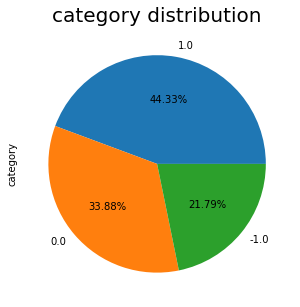

In [14]:
plt.figure(figsize=(10,5))
df['category'].value_counts().plot.pie(autopct ='%.2f%%' )
plt.title('category distribution',fontsize =20)

## Observations
- Missings values  are present
- Inconsistencies present in the clean_text column 
- The category column is not even which is not a good practice for performing sentiment analysis
- Category column is the sentiment column and it is grouped into:
  - 1 → Negative
  - 0 → Neutral
  - 1 → Positive

In [15]:
# remove missing value
df = df.dropna()

In [16]:
df.isnull().sum()

clean_text    0
category      0
dtype: int64

In [17]:
df.shape

(162969, 2)

In [18]:
# handling inconsistencies(cleaning data)
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove numbers and special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    #text = [port_stem.stem(word) for word in text if not word in stopwords.words('english')] # performig stemming
    #text = ' '.join(text)
    return text



In [19]:
# Apply cleaning and stemming to the 'clean_text' column
df['processed_text'] = df['clean_text'].astype(str).apply(clean_text)

# Display sample cleaned text
df[['clean_text', 'processed_text']].head()

,clean_text,processed_text
0,when modi promised “minimum government maximum...,when modi promised minimum government maximum ...
1,talk all the nonsense and continue all the dra...,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...,what did just say vote for modi welcome bjp to...
3,asking his supporters prefix chowkidar their n...,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...,answer who among these the most powerful world...


In [20]:
df.head()

,clean_text,category,processed_text
0,when modi promised “minimum government maximum...,-1.0,when modi promised minimum government maximum ...
1,talk all the nonsense and continue all the dra...,0.0,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...,1.0,what did just say vote for modi welcome bjp to...
3,asking his supporters prefix chowkidar their n...,1.0,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...,1.0,answer who among these the most powerful world...


In [21]:
#seperating data and label
X = df['processed_text']
Y = df['category']

In [22]:
print(X)
print(Y)

0         when modi promised minimum government maximum ...
1         talk all the nonsense and continue all the dra...
2         what did just say vote for modi welcome bjp to...
3         asking his supporters prefix chowkidar their n...
4         answer who among these the most powerful world...
                                ...                        
162975    why these crores paid neerav modi not recovere...
162976    dear rss terrorist payal gawar what about modi...
162977    did you cover her interaction forum where she ...
162978    there big project came into india modi dream p...
162979    have you ever listen about like gurukul where ...
Name: processed_text, Length: 162969, dtype: object
0        -1.0
1         0.0
2         1.0
3         1.0
4         1.0
         ... 
162975   -1.0
162976   -1.0
162977    0.0
162978    0.0
162979    1.0
Name: category, Length: 162969, dtype: float64


## Converting text column to numerical  column 

In [23]:
# Convert text into numerical features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)  # Transform text into numerical vectors


# Treating uneven category Using random oversampling method


In [24]:
!pip install imbalanced-learn

In [25]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy='auto',random_state=42)
X_ros, y_ros = ros.fit_resample(X,Y)

Text(0, 0.5, 'category')

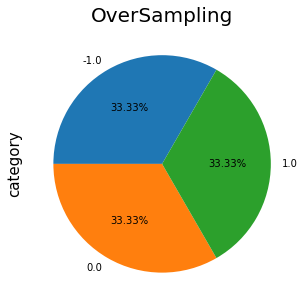

In [26]:
plt.figure(figsize=(10,5))
ax = y_ros.value_counts().plot.pie(autopct ='%.2f%%',startangle=60)
plt.title('OverSampling',fontsize =20)
plt.ylabel('category',fontsize=15)

In [27]:
y_ros.value_counts()

-1.0    72249
 0.0    72249
 1.0    72249
Name: category, dtype: int64

##  Spliting data to training and testing datas

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X_ros, y_ros, test_size=0.2, stratify=y_ros, random_state=42)

In [29]:

print("Before Oversampling:")
print("X shape:", X.shape)
print("y shape:", Y.shape)


Before Oversampling:
X shape: (162969, 101170)
y shape: (162969,)


In [30]:
print("After Oversampling:")
print("X_ros shape:", X_ros.shape)
print("y_ros shape:", y_ros.shape)

After Oversampling:
X_ros shape: (216747, 101170)
y_ros shape: (216747,)


In [31]:
print(X.shape,X_train.shape,X_test.shape)

(162969, 101170) (173397, 101170) (43350, 101170)


In [32]:
print(X_train)

  (0, 30370)	0.8944045476398046
  (0, 3120)	0.43133303100928727
  (0, 57497)	0.118289143718169
  (1, 37169)	0.31354723300786197
  (1, 27144)	0.382962640595117
  (1, 50021)	0.3594941267353093
  (1, 66530)	0.4113691515015806
  (1, 12196)	0.22606738703318388
  (1, 12184)	0.19256091893234675
  (1, 98335)	0.19572736786254563
  (1, 36358)	0.17551707019108787
  (1, 35579)	0.13120596019477673
  (1, 59604)	0.12463242670206313
  (1, 67738)	0.14233617849792474
  (1, 8866)	0.1680335893648843
  (1, 26706)	0.14507315365206822
  (1, 71062)	0.17126141496421707
  (1, 34940)	0.20390240063145815
  (1, 63030)	0.1311564081169423
  (1, 58822)	0.16513153961901245
  (1, 13262)	0.08275712441165521
  (1, 90754)	0.07337702576586087
  (1, 33093)	0.08673373101756714
  (1, 40284)	0.10489675530518422
  (1, 73607)	0.10693258322807876
  :	:
  (173394, 95186)	0.3809846553894073
  (173394, 14397)	0.3734046830188844
  (173394, 73576)	0.3050736668883385
  (173394, 55271)	0.22455226672688477
  (173394, 47320)	0.67810728962

In [33]:
print(X_test)

  (0, 71278)	0.36053463257794655
  (0, 25906)	0.3585182096353732
  (0, 61578)	0.45220169870452015
  (0, 56674)	0.3475794014724818
  (0, 98133)	0.3831112904624445
  (0, 42136)	0.2258727062588965
  (0, 51676)	0.2836412174874366
  (0, 60871)	0.2859018935975541
  (0, 100529)	0.21892857755444087
  (0, 57497)	0.09092282457974464
  (1, 29374)	0.4108741207029312
  (1, 849)	0.2508001502497388
  (1, 80855)	0.30899301302773935
  (1, 50238)	0.24995591294757133
  (1, 18653)	0.24473015468299456
  (1, 53882)	0.25884695926084833
  (1, 61986)	0.19553762858403717
  (1, 1303)	0.25031561610305747
  (1, 72898)	0.24441581447790453
  (1, 78515)	0.188670235742199
  (1, 55550)	0.2547169468813239
  (1, 51676)	0.30162767354720993
  (1, 40284)	0.16991893064808855
  (1, 100529)	0.11640571512437332
  (1, 71825)	0.24081943189364163
  :	:
  (43348, 18805)	0.20422361069374706
  (43348, 35409)	0.12506234705472483
  (43348, 571)	0.10890284681716363
  (43348, 90635)	0.31138130345787685
  (43348, 35321)	0.1398950334125986

## Training the Machine learning Model Using Logistic Regression

In [34]:
model = LogisticRegression(max_iter = 1000)

In [35]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

## Model Evaluation

In [36]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train) #giving only the tweet  for the model to find the values of the category
training_data_accuracy = accuracy_score(Y_train,X_train_prediction)

In [37]:
print('Accuracy On the Training Data:', training_data_accuracy)

Accuracy On the Training Data: 0.9562679861819985


In [38]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test) #giving only the tweet  for the model to find the values of the category
test_data_accuracy = accuracy_score(Y_test,X_test_prediction)

In [39]:
print('Accuracy On the Test Data:', test_data_accuracy)

Accuracy On the Test Data: 0.9398385236447521


## Saving thhe trained Model

In [40]:
import pickle
filename = 'trainedtwiter_model.sav'
pickle.dump(model,open(filename,'wb'))

## Testing the model with a new data 

In [41]:
loaded_model = pickle.load(open('C:/Users/Oreva/trainedtwiter_model.sav','rb'))

In [42]:
X_new = X_test.getrow(3).toarray()  # Extract the 4th row as a dense array
actual_label = Y_test.iloc[3]   # Get the actual label

print("Actual label:", actual_label)

prediction = loaded_model.predict(X_new)
pred_value = int(prediction[0])  # Extract scalar value

if pred_value == 0:
    print('Negative Tweet')
elif pred_value == 1:
    print('Positive Tweet')
else:
    print('Neutral Tweet')

Actual label: -1.0
Neutral Tweet


In [43]:
X_new = X_test.getrow(200).toarray()  # Extract the 4th row as a dense array
actual_label = Y_test.iloc[200]   # Get the actual label

print("Actual label:", actual_label)

prediction = loaded_model.predict(X_new)
pred_value = int(prediction[0])  # Extract scalar value

if pred_value == 0:
    print('Negative Tweet')
elif pred_value == 1:
    print('Positive Tweet')
else:
    print('Neutral Tweet')

Actual label: 1.0
Positive Tweet


## Conclusion

The  model's accuracy:

✅ Training Data: 95.63%

✅ Test Data: 93.98%

- This shows that the model is a good fit since the dfference between test and train data is slightly different.

- The model predicted the new datas accurately thhere the sentiment analysis is successful.


